In [12]:
import pandas as pd
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting, prim
from ema_workbench import (RealParameter, ScalarOutcome, Constant,
                           Model, MultiprocessingEvaluator, SequentialEvaluator, ema_logging,
                           perform_experiments, Policy, Scenario)
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench import Constraint
from ema_workbench.util.utilities import (save_results, load_results)
import seaborn as sns
from SALib.analyze import sobol
import matplotlib.pyplot as plt


In [2]:
# get results from MORO
result_MORO = pd.read_csv('ANALYSIS_results/robust_results_10scenario_100nfe.csv')

In [3]:
# get policies
policies = result_MORO[['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2']]
policies_list = [Policy(str(index), **row.to_dict()) for index, row in policies.iterrows()]

In [4]:
# run model using sobol sampling
ema_logging.log_to_stderr(ema_logging.INFO)
model, functions = get_model_for_problem_formulation(2)

with MultiprocessingEvaluator(model) as evaluator:
    experiment, result = evaluator.perform_experiments(
                                         scenarios=100,
                                         policies = policies_list, 
                                         uncertainty_sampling='lhs')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 2 policies * 1 model(s) = 200 experiments
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 140 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
# set up prim
x_prim = experiment[['discount rate 0', 'discount rate 1', 'discount rate 2', 'A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_pfail', 'A.1_Brate', 'A.2_Bmax', 'A.2_pfail', 'A.2_Brate', 'A.3_Bmax', 'A.3_pfail', 'A.3_Brate', 'A.4_Bmax', 'A.4_pfail', 'A.4_Brate', 'A.5_Bmax', 'A.5_pfail', 'A.5_Brate']]

y_prim = (result['Expected Number of Deaths'] > 0) | (result['Minimum water level full network'] < 4)

In [14]:
prim_alg = prim.Prim(x_prim, y_prim, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] 200 points remaining, containing 128 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.13, coverage: 0.203125, density: 1.0 restricted_dimensions: 10


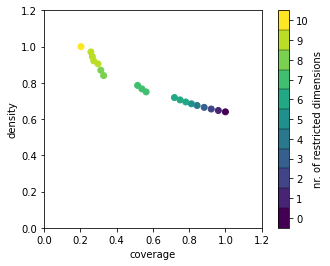

In [15]:
box1.show_tradeoff()
plt.show()

coverage    0.539062
density     0.766667
id                10
mass            0.45
mean        0.766667
res_dim            7
Name: 10, dtype: object

                                  box 10                   \
                                     min              max   
A.5_pfail                       0.009404         0.838298   
A.2_Bmax                        31.73297        335.44594   
A.4_pfail                       0.000849         0.929822   
discount rate 1          {2.5, 3.5, 4.5}  {2.5, 3.5, 4.5}   
A.1_Bmax                       72.068595       347.545292   
A.0_ID flood wave shape              6.0            132.0   
A.5_Bmax                       43.537264       347.274082   

                                                      
                                           qp values  
A.5_pfail                 [-1.0, 0.1834713402996987]  
A.2_Bmax                 [-1.0, 0.41141738303873726]  
A.4_pfail                [-1.0, 0.41141738303873726]  
discount rate 1         

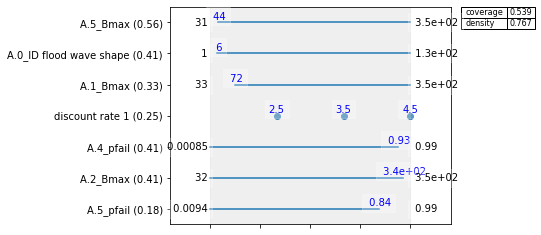

In [20]:
box1.inspect(10)
box1.inspect(10, style='graph')
plt.show()

In [24]:
box1.box_lims()

TypeError: 'list' object is not callable